## Main figures

## Figure 5: Histograms of variance explained by the first three principal components (PCs)¶


### Estupinan-Suarez, et al.  (2021). A Regional Earth System Data Lab for Understanding Ecosystem Dynamics: An Example from Tropical South America. Front. Earth Sci. 9:613395. doi: 10.3389/feart.2021.613395
#### Correspondence to: lestup@bgc-jena.mpg.de, linamaesu@gmail.com
#### GitHub repository: https://github.com/linamaes/Regional_ESDL


This script does the following:
- Plots histograms of PCs explained variance by land cover types

About the notebook:
- It is written in Julia 1.3
- "#" comments in the code are intended to explain specific aspects of the coding
- New steps in workflows are introduced with bold headers

March 2021, Max Planck Institute for Biogeochemistry, Jena, Germany

### Activate environment, loading packages

In [1]:
using OnlineStats

In [2]:
using ESDL

In [3]:
using ESDLPlots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11522350153371005786\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6260119923693269100\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11522350153371005786\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [4]:
using CSV

In [5]:
using Dates

In [6]:
using NPZ

In [7]:
using NetCDF

In [8]:
using OnlineStats

In [9]:
using Plots

In [10]:
using DelimitedFiles

In [11]:
gr(size=(600,400))
default(fmt = :png)

## Load data

### PCA components significance 1km

In [12]:
pcasigin = loadCube("pcaComSigLoadings1km2014_qamask")

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Components_or_Var   Axis with 4 elements: sigPC_var1 sigPC_var2 sigPC_var3 sigPC_var4 
info_PCA            Axis with 4 elements: PC_Significance LoadingPC1 LoadingPC2 LoadingPC3 
Total size: 707.52 MB


In [13]:
pcasig = pcasigin[info_PCA="PC_Significance"]

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Components_or_Var   Axis with 4 elements: sigPC_var1 sigPC_var2 sigPC_var3 sigPC_var4 
Total size: 176.88 MB


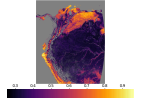

In [48]:
plotMAP(pcasig[Components_or_Var ="sigPC_var1"])

### Load land cover map from ESA from a NetCDF file

In [15]:
pathin1 = "/my_path_in/folder1/"

pathin2 = "/my_path_in/folder2/"

"/my_path_in/folder2/"

In [17]:
clcin = ncread(string(pathin1, "/LC_ESA/lc_esa2014.nc"),"Land.cover.class.defined.in.LCCS");

In [18]:
clcmis = map(x->x==210.0 ? missing : x, clcin);

In [19]:
pcasig.axes[1]

Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665

In [20]:
clc = CubeMem(CubeAxis[pcasig.axes[1], pcasig.axes[2]], clcmis)

In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 44.22 MB


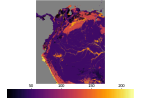

In [21]:
plotMAP(clc)

In [22]:
# Load land cover legend as dictionary
clcdic = include(string(pathin2,"/ESA_LC/legend/ESALClegend2014.jl"));

In [23]:
# Assign dictionary as propertes of the clc cube
clc.properties["labels"]=include(string(pathin2,"/ESA_LC/legend/ESALClegend2014.jl"));

In [24]:
plotMAP(clc)

## Example of mask for selected land cover types and extraction of PCs information

In [25]:
# Get unique values of land cover types in the study area
clcid = unique(clc[:,:]);

In [26]:
i = 2
clcdic[clcid[i]]

"Tree cover, broadleaved, evergreen, closed to open (>15%)"

In [27]:
i=2
clcmask = map(x-> ismissing(x) ? missing : x==clcid[i] ? 1 : missing, clc) #[lon=lon,lat=lat]

Transformed cube In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 44.22 MB


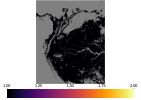

In [28]:
plotMAP(clcmask)

In [29]:
 pcasig[Components_or_Var="sigPC_var1"]

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 44.22 MB


In [30]:
clcmask

Transformed cube In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 44.22 MB


In [31]:
commask1 = map((x,y)->x*y, pcasig[Components_or_Var="sigPC_var1"], clcmask)
commask2 = map((x,y)->x*y, pcasig[Components_or_Var="sigPC_var2"], clcmask)
commask3 = map((x,y)->x*y, pcasig[Components_or_Var="sigPC_var3"], clcmask)

Transformed cube ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 44.22 MB


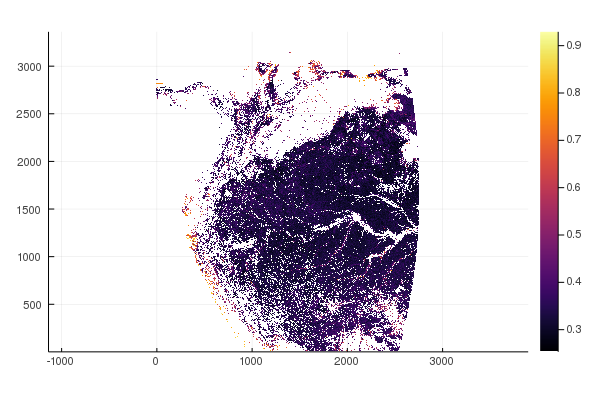

In [32]:
heatmap(commask1[:,:]'[end:-1:1,:], aspect_ratio = :equal)#, dmin=0)

## Figure 5: Histogram of variance explained by the first three principal components

### Define function for plotting histograms

In [33]:
function plotPCshisto(i, clcid, clc, pcasig, titlen; legendYN = :false)
# titlen = clcdic[clcid[i]]

# Generate mask for the selected land cover type
clcmask = map(x-> ismissing(x) ? missing : x==clcid[i] ? 1 : missing, clc) 

# Select data of each PCs based on the land cover type (mask generation)
@show(i)
commask1 = map((x,y)->x*y, pcasig[Components_or_Var="sigPC_var1"], clcmask)
commask2 = map((x,y)->x*y, pcasig[Components_or_Var="sigPC_var2"], clcmask)
commask3 = map((x,y)->x*y, pcasig[Components_or_Var="sigPC_var3"], clcmask)

# Filter data that is higher than zero
h1 = filter(x->x>0, skipmissing(commask1[:,:]))
h2 = filter(x->x>0, skipmissing(commask2[:,:]))
h3 = filter(x->x>0, skipmissing(commask3[:,:]));

varname = "Number of pixels"
xname = "Variance explained"

# Plot histograms
hbar = plot(h1, seriestype=:barhist, color="red", linealpha=0.0, label="Component 1", 
    title = titlen, titlefont = font(10), legend = legendYN,
        xlabel = xname, xlim = (0,1), xtickfont = font(10),
        ylabel = varname, ytickfont=font(10), guidefont=font(10))
plot!(h2, seriestype=:barhist, color="green", linealpha=0.0, label="Component 2") 
plot!(h3, seriestype=:barhist,  color="blue", linealpha=0.0, label="Component 3",
    size=(400,300))

return(hbar)

end

plotPCshisto (generic function with 1 method)

### Broadleaf evergreen forest

In [34]:
i =2
titlen = clcdic[clcid[i]]

"Tree cover, broadleaved, evergreen, closed to open (>15%)"

In [35]:
titlen = "Tree cover BrEv-co."

"Tree cover BrEv-co."

i = 2


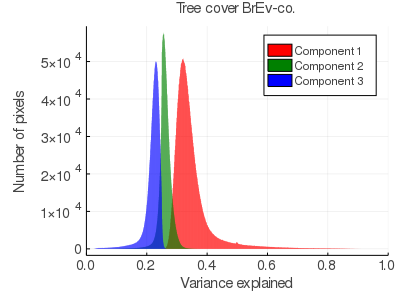

In [36]:
# Replace title with a shorter name
plotPCshisto(i, clcid, clc, pcasig, titlen; legendYN = :true)

### Shrubland

In [37]:
i = 15 # Shrubland
titlen = clcdic[clcid[i]]

"Shrubland"

i = 15


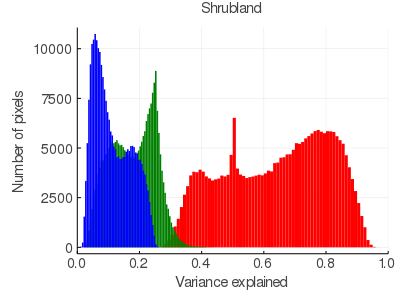

In [38]:
plotPCshisto(i, clcid, clc, pcasig, titlen; legendYN = :false)

### Grassland

In [39]:
i = 14 # Grassland
titlen = clcdic[clcid[i]]

"Grassland"

i = 14


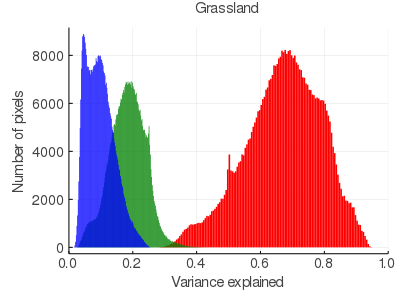

In [40]:
plotPCshisto(i, clcid, clc, pcasig, titlen; legendYN = :false)

### Herbaceous

In [41]:
i =12
titlen = clcdic[clcid[i]]

"Mosaic herbaceous cover (>50%) / tree and shrub (<50%)"

In [44]:
# Replace title with a shorter name
titlen = "Herbaceous cover with trees/shrubs"#

"Herbaceous cover with trees/shrubs"

i = 12


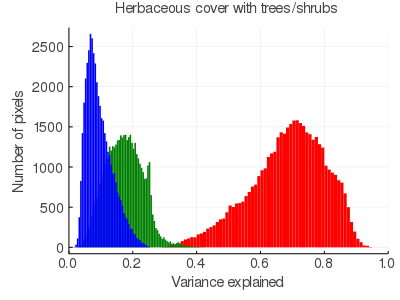

In [45]:
plotPCshisto(i, clcid, clc, pcasig, titlen; legendYN = :false)